<a href="https://colab.research.google.com/github/ArtyomKopan/GlowByte-Internship/blob/main/%D0%9F%D1%80%D0%BE%D0%BC%D1%8B%D1%88%D0%BB%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import gym
import pyqlearning
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Задание 1

In [ ]:
data1 = pd.read_csv('drive/MyDrive/Датасеты/optimization_data1.csv')
data2 = pd.read_csv('drive/MyDrive/Датасеты/optimization_data2.csv')

In [ ]:
print(list(data1))

['DateTime', 'Ni1', 'S1', 'Fe3O41', 'Ni2', 'S2', 'Fe3O42', 'Ni3', 'S3', 'Fe3O43', 'Ni4', 'S4', 'Fe3O44', 'Ni_final', 'S_final', 'Fe3O4_final', 'ro1', 'ro2', 'ro3', 'ro4', 'ro_final', 'ust1', 'ust2', 'ust3', 'ust4', 'v_final', 'level_final']


In [ ]:
data1 = data1.query('ro1 >= 1.0 & ro1 <= 2.5')
data1 = data1.query('ro2 >= 1.0 & ro2 <= 2.5')
data1 = data1.query('ro3 >= 1.0 & ro3 <= 2.5')
data1 = data1.query('ro4 >= 1.0 & ro4 <= 2.5')

In [ ]:
data2 = data2.query('ro1 >= 1.0 & ro1 <= 2.5')
data2 = data2.query('ro2 >= 1.0 & ro2 <= 2.5')
data2 = data2.query('ro3 >= 1.0 & ro3 <= 2.5')
data2 = data2.query('ro4 >= 1.0 & ro4 <= 2.5')

In [ ]:
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()

In [ ]:
data1.head()

,DateTime,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
0,2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.68910,2.01670,1.86565,1.8684,0.0,0.0,44,97.0,179,69.2796
1,2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69955,2.02900,1.86145,1.8752,0.0,0.0,44,97.0,179,69.1331
2,2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69980,2.04530,1.85210,1.8635,0.0,0.0,44,97.0,179,66.7399
3,2021-01-01 00:03:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69845,2.05230,1.84420,1.8572,0.0,0.0,44,97.0,179,64.2247
4,2021-01-01 00:04:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69470,2.06035,1.83950,1.8526,0.0,0.0,44,97.0,179,62.2955


In [ ]:
data2.head()

,DateTime,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
0,2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.68910,2.01670,1.86565,1.8892,0.0,44.0,23.0,167.0,163,64.9328
1,2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69955,2.02900,1.86145,1.8896,0.0,44.0,23.0,167.0,163,66.4469
2,2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69980,2.04530,1.85210,1.8833,0.0,44.0,23.0,167.0,163,68.4982
3,2021-01-01 00:03:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69845,2.05230,1.84420,1.8812,0.0,44.0,23.0,167.0,163,71.1600
4,2021-01-01 00:04:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69470,2.06035,1.83950,1.8796,0.0,44.0,23.0,167.0,163,74.9939


In [ ]:
data1.describe()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
count,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,...,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000,489633.000000
mean,5.568443,19.543066,2.019991,5.940489,17.571800,2.575378,7.626039,19.580014,2.435560,8.922242,...,1.643270,1.709154,1.831221,1.622045,17.851781,19.951251,26.125768,128.449026,124.083759,49.519644
std,1.268120,2.699316,0.868119,1.816763,3.059676,1.348188,1.327672,3.885691,1.158091,0.478993,...,0.461122,0.356697,0.358637,0.375100,13.691407,18.774828,20.495401,22.024644,86.909106,28.872155
min,3.660000,9.930000,0.700000,2.890000,8.100000,0.200000,4.130000,11.300000,0.300000,4.540000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,62.000000,0.000000,-1.000000
25%,4.730000,19.000000,1.500000,4.500000,16.150000,1.600000,6.620000,16.700000,1.800000,8.670000,...,1.172050,1.626200,1.721800,1.239300,6.000000,10.000000,10.000000,114.000000,0.000000,40.024400
50%,5.180000,20.200000,1.800000,5.300000,18.490000,2.000000,7.430000,18.840000,2.400000,8.900000,...,1.790050,1.791700,1.894650,1.835500,18.000000,10.000000,25.000000,125.000000,164.000000,56.678900
75%,6.020000,21.200000,2.200000,7.670000,19.500000,3.500000,8.480000,21.900000,3.300000,9.150000,...,1.985500,1.911700,2.074800,1.902100,26.000000,27.000000,42.000000,140.000000,186.000000,72.307700
max,9.600000,27.700000,6.200000,10.240000,29.540000,7.900000,10.890000,38.300000,6.300000,10.440000,...,2.500000,2.500000,2.500000,2.999800,81.000000,93.000000,96.000000,213.000000,285.000000,100.000000


In [ ]:
data2.describe()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
count,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000,...,489634.000000,489634.000000,489634.000000,489634.000000,489634.00000,489634.000000,489634.000000,489634.000000,489634.000000,489634.000000
mean,5.568449,19.543040,2.020000,5.940488,17.571797,2.575379,7.626036,19.580024,2.435558,8.922237,...,1.643270,1.709155,1.831221,1.581677,17.50561,15.561252,21.527978,114.283497,120.342715,52.084687
std,1.268127,2.699341,0.868135,1.816760,3.059677,1.348185,1.327672,3.885692,1.158091,0.479000,...,0.461122,0.356697,0.358639,0.385457,15.40103,17.814795,18.693736,30.689006,79.895854,28.733660
min,3.660000,9.930000,0.700000,2.890000,8.100000,0.200000,4.130000,11.300000,0.300000,4.540000,...,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,51.000000,0.000000,-1.000000
25%,4.730000,19.000000,1.500000,4.500000,16.150000,1.600000,6.620000,16.700000,1.800000,8.670000,...,1.172050,1.626200,1.721800,1.000000,5.00000,0.000000,5.000000,92.000000,0.000000,44.151400
50%,5.180000,20.200000,1.800000,5.300000,18.490000,2.000000,7.430000,18.840000,2.400000,8.900000,...,1.790050,1.791750,1.894650,1.805600,15.00000,10.000000,20.000000,119.000000,155.000000,58.608100
75%,6.020000,21.200000,2.200000,7.670000,19.500000,3.500000,8.480000,21.900000,3.300000,9.150000,...,1.985500,1.911700,2.074800,1.881300,27.00000,22.000000,36.000000,135.000000,180.000000,72.551900
max,9.600000,27.700000,6.200000,10.240000,29.540000,7.900000,10.890000,38.300000,6.300000,10.440000,...,2.500000,2.500000,2.500000,2.994400,420.00000,87.000000,88.000000,240.000000,228.000000,100.000000


<Axes: >

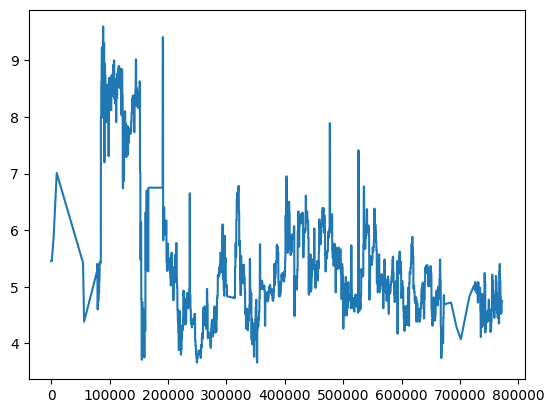

In [ ]:
data1.Ni1.plot()

<Axes: >

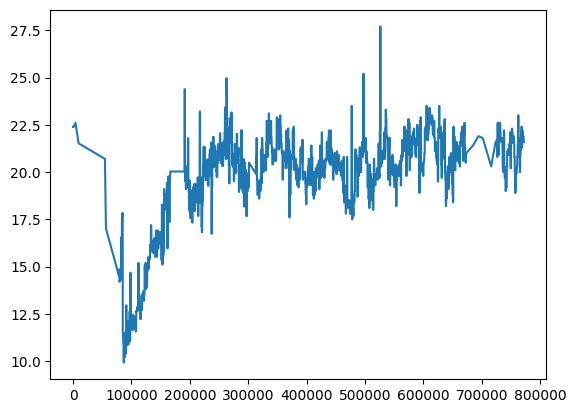

In [ ]:
data1.S1.plot()

В изменении концентрации серы можно заметить тенденцию к росту. Можно попытаться интерполировать неизвестную функцию концентрации многочленами

<Axes: >

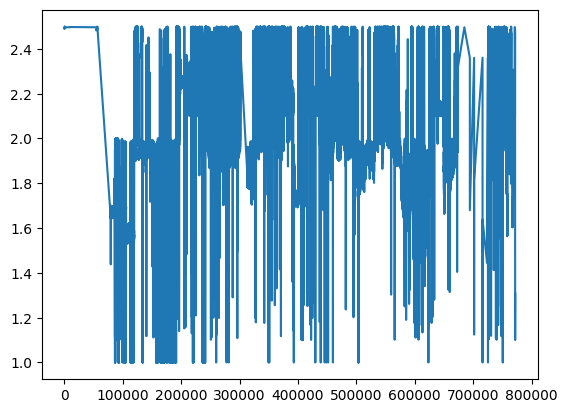

In [ ]:
data1.ro1.plot()

<Axes: >

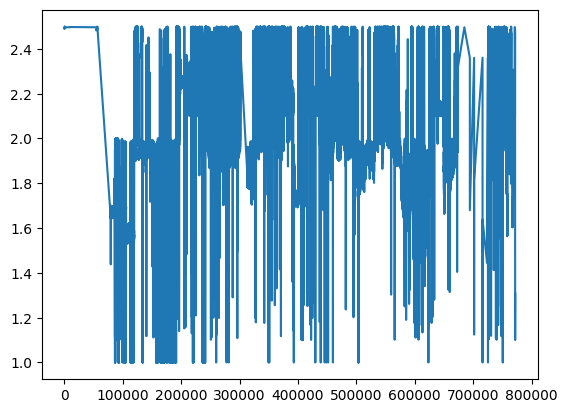

In [ ]:
data2.ro1.plot()

<Axes: >

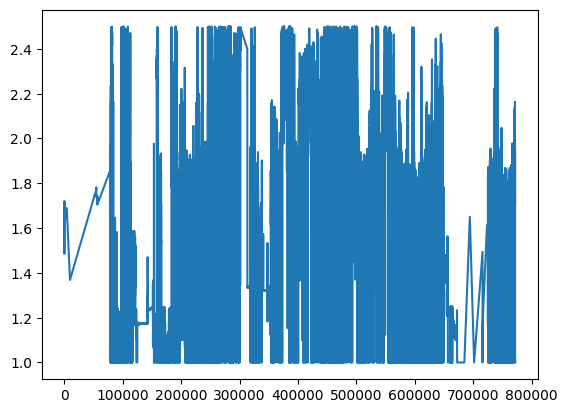

In [ ]:
data1.ro2.plot()

<Axes: >

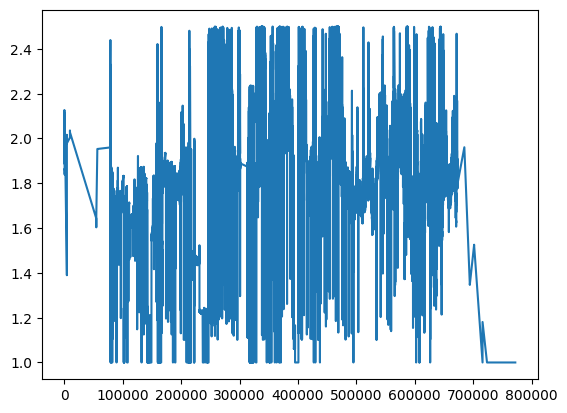

In [ ]:
data1.ro3.plot()

<Axes: >

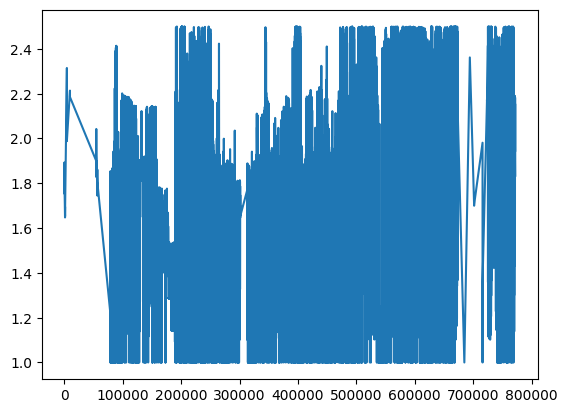

In [ ]:
data1.ro4.plot()

Данные довольно плохие. Есть идея: разбить временной ряд на отдельные небольшие отрезки, и на каждом из них функция будет похожа на линейную (судя по графику).

# Задание 2

Построим математическую модель происходящих процессов.
Концентрация вещества на выходе:

$c = \frac{c_1 F_1 + c_2 F_2 + c_3 F_3 + c_4 F_4}{F_1 + F_2 + F_3 + F_4}$

Здесь $c$ -- концентрация вещества (любого из данных), $F_i$ -- поток вещества из $i$-й ёмкости, $c_i$ -- концентрация вещества в $i$-й ёмкости. Поток линейно зависит от уставки.

Для примера возьмём никель.

In [ ]:
X_Ni = pd.DataFrame(
    data=(data1.Ni1 * data1.ust1 + data1.Ni2 * data1.ust2 + data1.Ni3 * data1.ust3 + data1.Ni4 * data1.ust4) / (data1.ust1 + data1.ust2 + data1.ust3 + data1.ust4),
    columns=['pred_c']
)
y_Ni = data1.Ni_final

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Ni, y_Ni, test_size=0.2)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

Для предсказания результата будем использовать модель градиентного бустинга на решающих деревьях.

In [ ]:
regressor = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    loss_function='RMSE'
)

In [ ]:
regressor.fit(train_pool, plot=True, plot_file='plot.html')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4167312	total: 83ms	remaining: 1m 22s
1:	learn: 0.4144406	total: 151ms	remaining: 1m 15s
2:	learn: 0.4121619	total: 242ms	remaining: 1m 20s
3:	learn: 0.4099310	total: 344ms	remaining: 1m 25s
4:	learn: 0.4077237	total: 427ms	remaining: 1m 24s
5:	learn: 0.4055478	total: 520ms	remaining: 1m 26s
6:	learn: 0.4034107	total: 601ms	remaining: 1m 25s
7:	learn: 0.4012940	total: 691ms	remaining: 1m 25s
8:	learn: 0.3992050	total: 786ms	remaining: 1m 26s
9:	learn: 0.3971586	total: 892ms	remaining: 1m 28s
10:	learn: 0.3951330	total: 987ms	remaining: 1m 28s
11:	learn: 0.3931439	total: 1.08s	remaining: 1m 28s
12:	learn: 0.3911836	total: 1.18s	remaining: 1m 29s
13:	learn: 0.3892492	total: 1.27s	remaining: 1m 29s
14:	learn: 0.3873435	total: 1.37s	remaining: 1m 29s
15:	learn: 0.3854693	total: 1.46s	remaining: 1m 29s
16:	learn: 0.3836327	total: 1.52s	remaining: 1m 28s
17:	learn: 0.3818225	total: 1.63s	remaining: 1m 28s
18:	learn: 0.3800340	total: 1.72s	remaining: 1m 29s
19:	learn: 0.3782685	to

In [ ]:
print(r2_score(y_test, regressor.predict(test_pool)))

0.5967828896913514


График изменения функции потерь во время обучения:

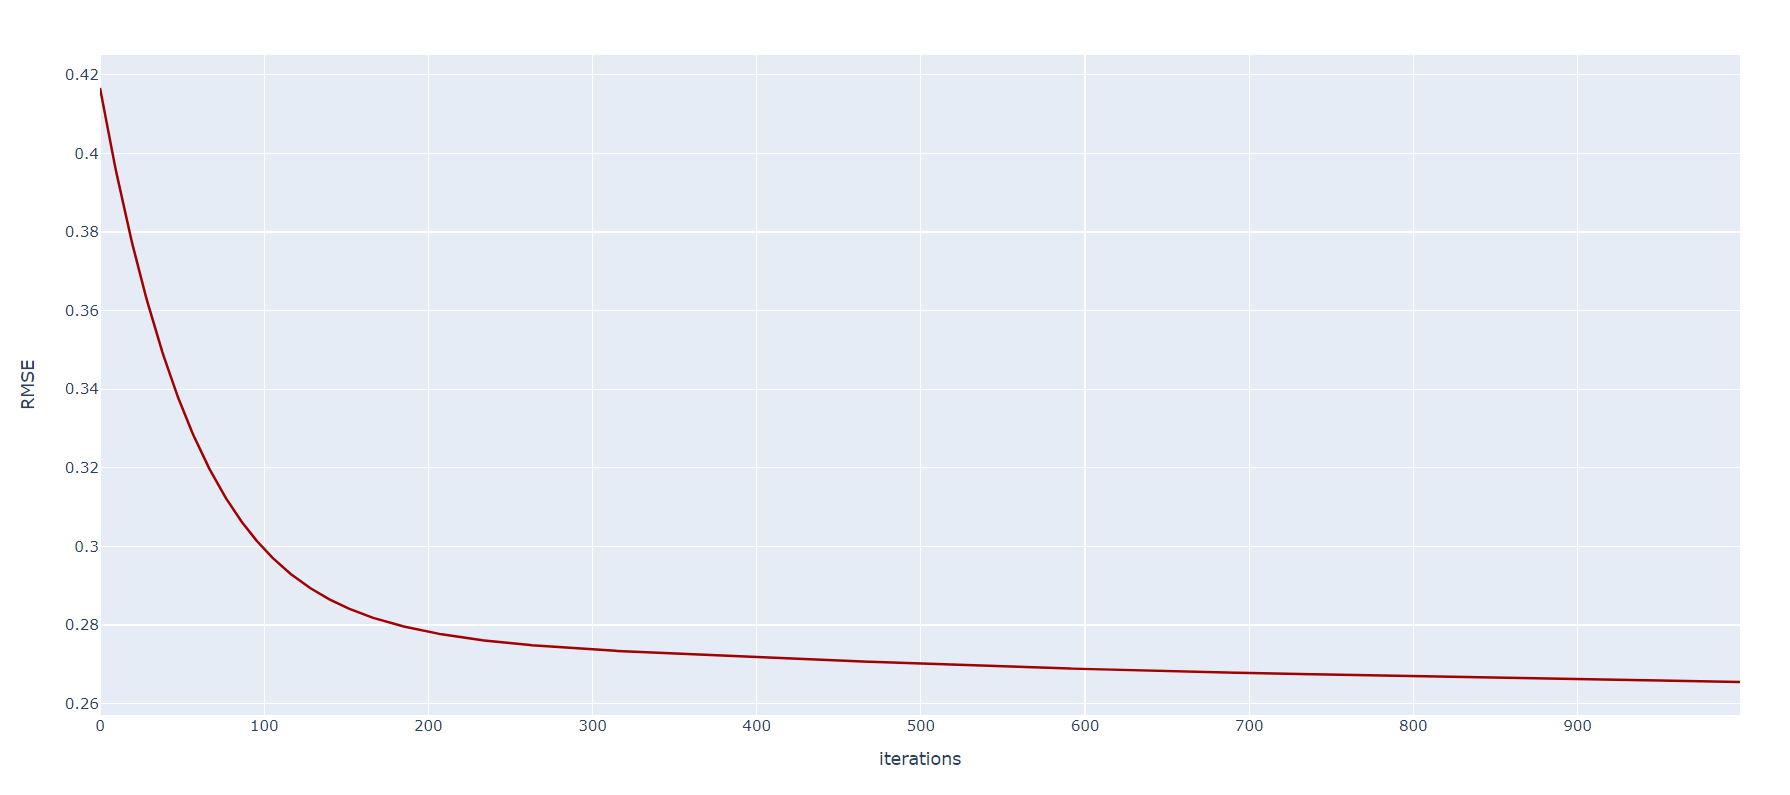

Далее имеет смысл варьировать значения уставок, чтобы повысить точность этой модели регрессии, а также попробовать использовать обучение с подкреплением для удержания значений в заданном диапазоне. Я сделаю эту часть задания чуть позже

# Задание 3

Я решил применить к задаче метод обучения с подкреплением, а именно Q-Learning, как самый простой и понятный его вид.